In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [26]:
breast_canser_datasets = sklearn.datasets.load_breast_cancer()

In [27]:
breast_canser_datasets

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
## this data in numpy array format we need to convert it into the data fromat
dataframe  = pd.DataFrame(breast_canser_datasets.data,columns=breast_canser_datasets.feature_names)

In [ ]:
dataframe['label'] = breast_canser_datasets.target # Changed breast_cancer_dataset to breast_canser_datasets

In [ ]:
correlation_matrix = dataframe.corr()
print(correlation_matrix['label'].sort_values(ascending=False))

label                      1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

In [ ]:
dataframe = dataframe.drop(columns=['mean fractal dimension', 'texture error', 'symmetry error',
                                      'fractal dimension error', 'concavity error', 'compactness error',
                                      'worst fractal dimension', 'mean symmetry', 'mean smoothness'], axis=1)

In [ ]:
dataframe.shape

(569, 22)

In [ ]:
dataframe.head(-1)

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,label
0,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0
1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0
2,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0
3,11.42,20.38,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0
4,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.22360,0.31740,0.14740,0.9622,8.758,118.80,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0
564,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0
565,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0
566,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean radius           569 non-null    float64
 1   mean texture          569 non-null    float64
 2   mean perimeter        569 non-null    float64
 3   mean area             569 non-null    float64
 4   mean compactness      569 non-null    float64
 5   mean concavity        569 non-null    float64
 6   mean concave points   569 non-null    float64
 7   radius error          569 non-null    float64
 8   perimeter error       569 non-null    float64
 9   area error            569 non-null    float64
 10  smoothness error      569 non-null    float64
 11  concave points error  569 non-null    float64
 12  worst radius          569 non-null    float64
 13  worst texture         569 non-null    float64
 14  worst perimeter       569 non-null    float64
 15  worst area            5

In [ ]:
dataframe.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean compactness,0
mean concavity,0
mean concave points,0
radius error,0
perimeter error,0
area error,0


In [ ]:
dataframe.describe()

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.104341,0.088799,0.048919,0.405172,2.866059,40.337079,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.052813,0.079720,0.038803,0.277313,2.021855,45.491006,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.019380,0.000000,0.000000,0.111500,0.757000,6.802000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.064920,0.029560,0.020310,0.232400,1.606000,17.850000,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.092630,0.061540,0.033500,0.324200,2.287000,24.530000,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.130400,0.130700,0.074000,0.478900,3.357000,45.190000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.345400,0.426800,0.201200,2.873000,21.980000,542.200000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,1.000000


In [ ]:
dataframe['label'].value_counts()

,count
label,
1,357
0,212


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean radius           569 non-null    float64
 1   mean texture          569 non-null    float64
 2   mean perimeter        569 non-null    float64
 3   mean area             569 non-null    float64
 4   mean compactness      569 non-null    float64
 5   mean concavity        569 non-null    float64
 6   mean concave points   569 non-null    float64
 7   radius error          569 non-null    float64
 8   perimeter error       569 non-null    float64
 9   area error            569 non-null    float64
 10  smoothness error      569 non-null    float64
 11  concave points error  569 non-null    float64
 12  worst radius          569 non-null    float64
 13  worst texture         569 non-null    float64
 14  worst perimeter       569 non-null    float64
 15  worst area            5

In [ ]:
dataframe.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,...,concave points error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.145188,0.160775,0.087990,0.609083,4.323929,72.672406,...,0.015060,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468
1,12.146524,17.914762,78.075406,462.790196,0.080085,0.046058,0.025717,0.284082,2.000321,21.135148,...,0.009858,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246


In [ ]:
## seprating the features and target

In [ ]:
x = dataframe.drop(columns = ['label'], axis = 1)
y = dataframe['label']

In [ ]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,...,concave points error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry
0,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,...,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,...,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,...,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,...,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,...,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [ ]:
## splitting the data into training and testing data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
## Building the neural network
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("tensorflow",tf.__version__)
print("scikitlearn",sklearn.__version__)

numpy 2.0.2
pandas 2.2.2
tensorflow 2.18.0
scikitlearn 1.6.1


In [33]:
### setting  up the layers of neural network
model = Sequential([
    Flatten(input_shape=(21,)),
    Dense(80, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(40, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(20, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(2, activation='sigmoid')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 80)             │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,862 (22.90 KB)

 Trainable params: 5,862 (22.90 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


In [37]:
## training the neural network
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6938 - loss: 0.7424 - val_accuracy: 0.9737 - val_loss: 0.4338
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8804 - loss: 0.4851 - val_accuracy: 0.9825 - val_loss: 0.2837
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9345 - loss: 0.3424 - val_accuracy: 0.9737 - val_loss: 0.2188
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9454 - loss: 0.3105 - val_accuracy: 0.9737 - val_loss: 0.1948
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9441 - loss: 0.2494 - val_accuracy: 0.9649 - val_loss: 0.1832
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9527 - loss: 0.2263 - val_accuracy: 0.9649 - val_loss: 0.1784
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9798 - loss: 0.1981 - val_accuracy: 0.9649 - val_loss: 0.1778
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9696 - loss: 0.2142 - val_accuracy: 0.9737 -

Text(0.5, 0, 'epoch')

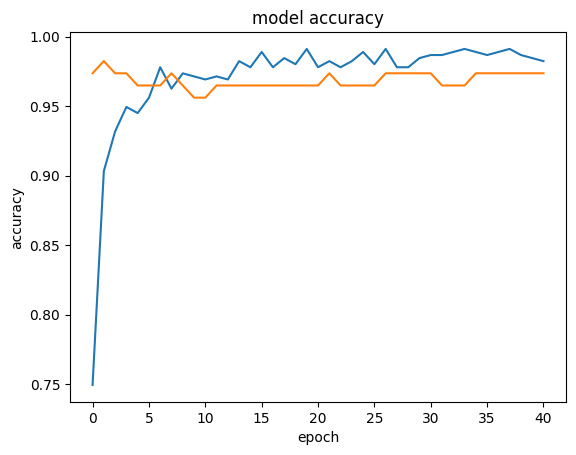

In [38]:
## visualizing accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

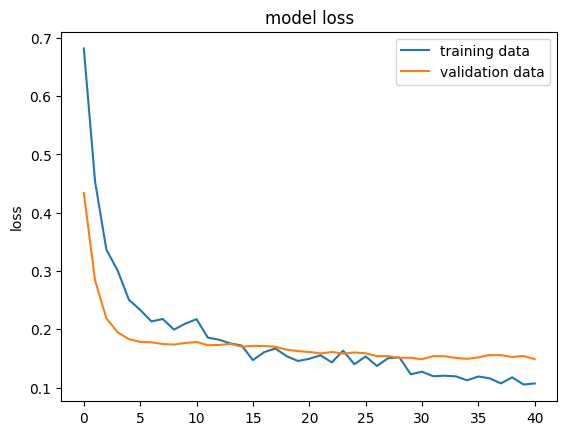

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.legend(['training data','validation data'],loc = 'upper right')

In [40]:
loss,accuracy = model.evaluate(X_test,y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9738 - loss: 0.1726 
0.9736841917037964


In [41]:
print(X_test[0])

[-0.46649743 -0.13728933 -0.44421138 -0.48646498  0.04160589 -0.11146496
 -0.26486866 -0.02091509 -0.17460869 -0.2072995  -0.01181432 -0.24238831
 -0.2632354  -0.14784208 -0.33154752 -0.35109337  0.48001942 -0.09649594
 -0.03583041 -0.19435087  0.17275669]


In [42]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [43]:
X_test

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.03583041,
        -0.19435087,  0.17275669],
       [ 1.36536344,  0.49866473,  1.30551088, ..., -0.02818105,
         0.99177862, -0.561211  ],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.4996247 ,
         0.57035018, -0.10783139],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.45033003,
        -0.27741059, -0.3820785 ],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ...,  0.15205697,
        -0.49027026, -1.60905688],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.33277307,
         0.7925579 , -0.05868885]])

In [44]:
y_pred

array([[1.01271123e-01, 8.21103752e-01],
       [9.99603570e-01, 2.52748514e-03],
       [9.88100886e-01, 3.61584798e-02],
       [3.05114267e-03, 9.83093560e-01],
       [6.37141115e-04, 9.94748116e-01],
       [1.00000000e+00, 1.25468955e-06],
       [9.99999583e-01, 1.62578981e-05],
       [9.46162999e-01, 1.13261305e-01],
       [3.88521373e-01, 5.47118545e-01],
       [6.91102585e-03, 9.74355042e-01],
       [1.04620568e-01, 8.08686256e-01],
       [9.63266313e-01, 7.41787553e-02],
       [3.97756100e-02, 9.10196722e-01],
       [9.77020681e-01, 5.15519008e-02],
       [5.84725197e-03, 9.76575553e-01],
       [9.99740243e-01, 1.63841550e-03],
       [7.64643075e-03, 9.72581744e-01],
       [2.29464931e-04, 9.97212350e-01],
       [5.00116257e-05, 9.99169469e-01],
       [9.99974489e-01, 3.79932753e-04],
       [6.40284941e-02, 8.71172369e-01],
       [1.85749251e-02, 9.43155825e-01],
       [9.99999762e-01, 1.17423142e-05],
       [2.32696207e-03, 9.86817718e-01],
       [1.479927

In [45]:
y_pred[2]

array([0.9881009 , 0.03615848], dtype=float32)

In [46]:
## converting the prediction  probability
my_list = [20,90,8]
index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[20, 90, 8]
1


In [47]:
y_pred_lebels = [np.argmax(i) for i in y_pred]

In [49]:


import numpy as np

def predict_breast_cancer(model,
                          mean_radius, mean_texture, mean_perimeter, mean_area, mean_compactness,
                          mean_concavity, mean_concave_points, radius_error, perimeter_error, area_error,
                          smoothness_error, concave_points_error, worst_radius, worst_texture,
                          worst_perimeter, worst_area, worst_smoothness, worst_compactness,
                          worst_concavity, worst_concave_points, worst_symmetry):

    # Create input array (1 sample, 21 features)
    input_data = np.array([[mean_radius, mean_texture, mean_perimeter, mean_area, mean_compactness,
                            mean_concavity, mean_concave_points, radius_error, perimeter_error, area_error,
                            smoothness_error, concave_points_error, worst_radius, worst_texture,
                            worst_perimeter, worst_area, worst_smoothness, worst_compactness,
                            worst_concavity, worst_concave_points, worst_symmetry]])

    # Make prediction
    prediction = model.predict(input_data)

    # Return human-readable result
    if prediction[0][0] > 0.5:
        return "🔴 The person is likely to have breast cancer."
    else:
        return "🟢 The person is unlikely to have breast cancer."




In [50]:
# Example input values (replace these with real patient data or user input)
mean_radius = 14.2
mean_texture = 20.1
mean_perimeter = 92.5
mean_area = 650.3
mean_compactness = 0.11
mean_concavity = 0.15
mean_concave_points = 0.08
radius_error = 0.4
perimeter_error = 1.5
area_error = 40.0
smoothness_error = 0.007
concave_points_error = 0.02
worst_radius = 17.5
worst_texture = 28.0
worst_perimeter = 115.0
worst_area = 880.0
worst_smoothness = 0.16
worst_compactness = 0.28
worst_concavity = 0.3
worst_concave_points = 0.15
worst_symmetry = 0.25

# Call the function
result = predict_breast_cancer(model,
                                mean_radius, mean_texture, mean_perimeter, mean_area, mean_compactness,
                                mean_concavity, mean_concave_points, radius_error, perimeter_error, area_error,
                                smoothness_error, concave_points_error, worst_radius, worst_texture,
                                worst_perimeter, worst_area, worst_smoothness, worst_compactness,
                                worst_concavity, worst_concave_points, worst_symmetry)

# Print the result
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
🔴 The person is likely to have breast cancer.


In [51]:
model.save("breast_model.keras")

In [52]:
import pickle
import tensorflow as tf # Ensure tensorflow is imported if model is a Keras object

# Example: save model as pickle
# Note: Pickling Keras models is generally not recommended.
# The preferred method is model.save()
with open("model.pkl", "wb") as f:
    # Correct syntax: pickle the model object itself
    pickle.dump(model, f)

In [53]:
model.save("model.h5")  # Or use .keras
